In [21]:
%matplotlib inline
from simulation import *

In [22]:
def findSet2(myG,myCenterNode,myMaxDeg):
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [28, 48, 90, 5, 46, 174, 153, 39, 134, 2] 
Slist :  [3]


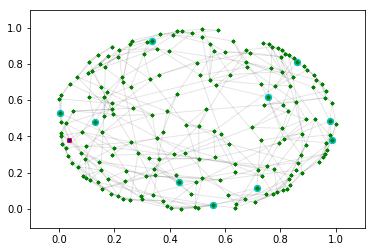

Starting infection


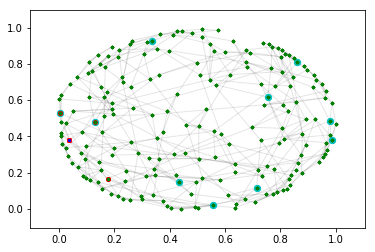

BITE


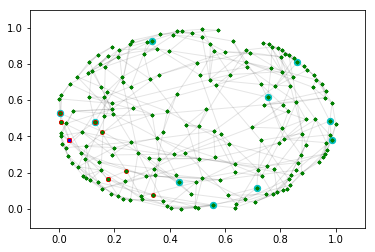

BITE


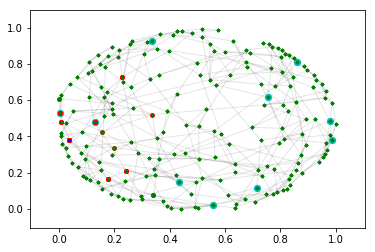

BITE


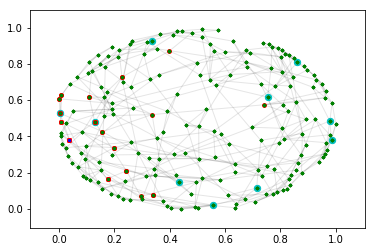

BITE


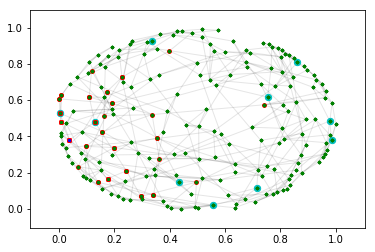

BITE


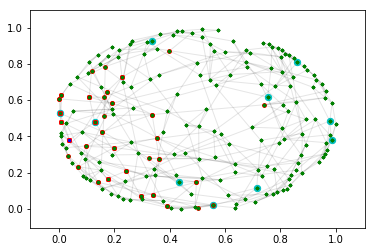

BITE


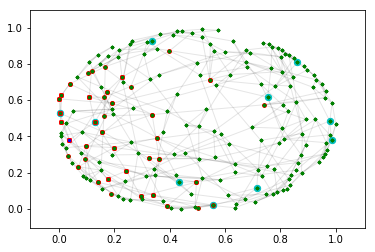

BITE


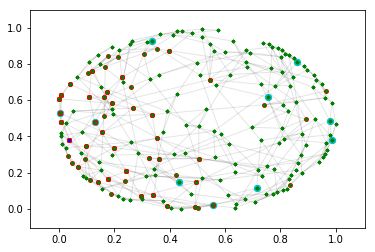

BITE


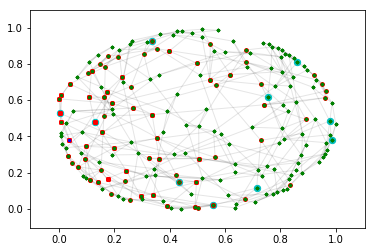

BITE


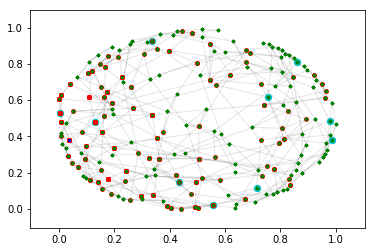

BITE


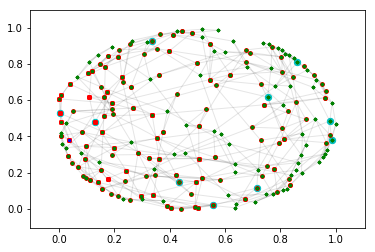

BITE


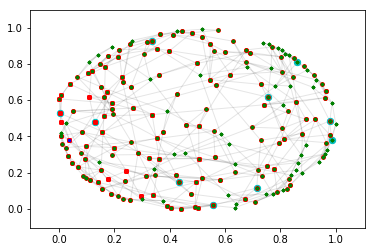

BITE


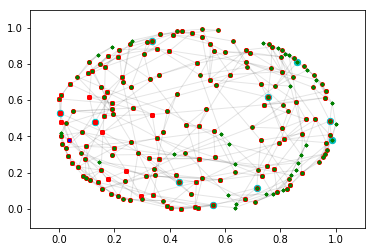

BITE


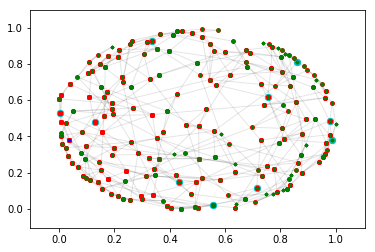

BITE


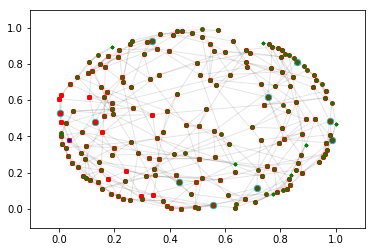

BITE


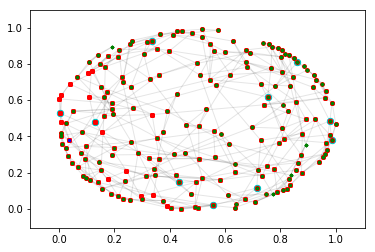

BITE


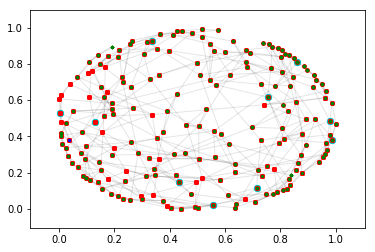

BITE


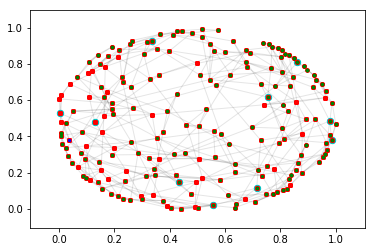

BITE


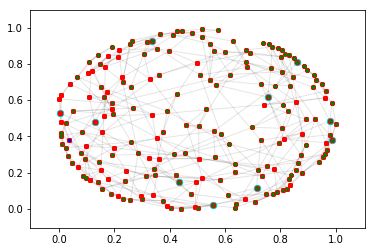

BITE


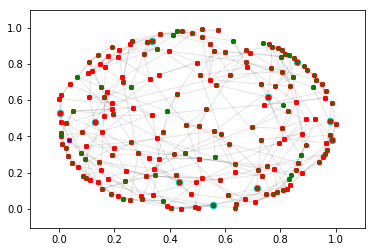

BITE


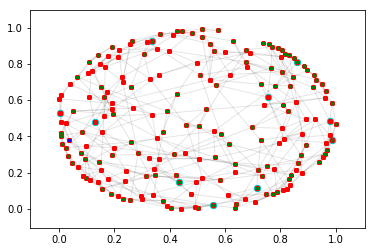

BITE


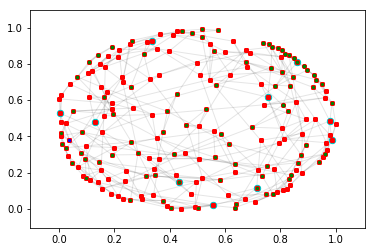

BITE


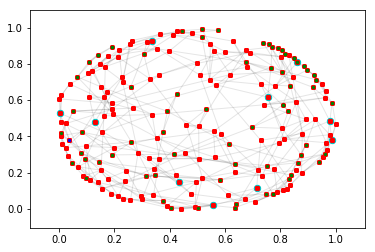

BITE


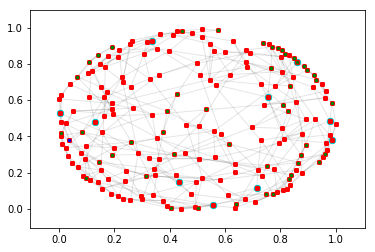

BITE


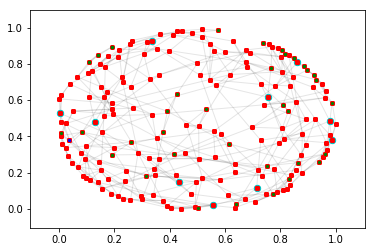

BITE


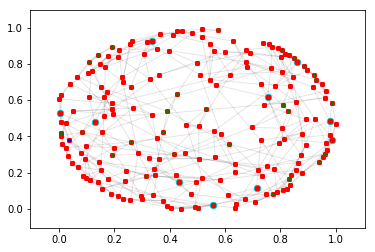

BITE


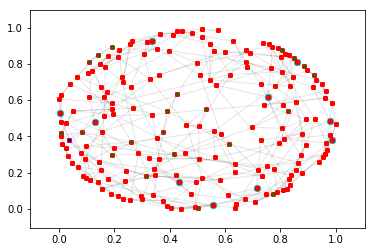

BITE


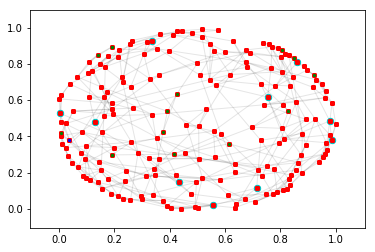

BITE


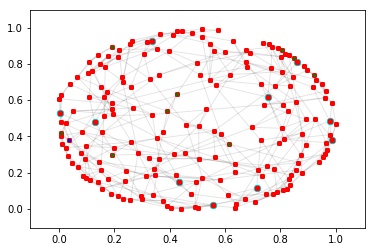

BITE


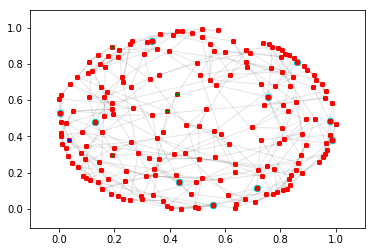

BITE


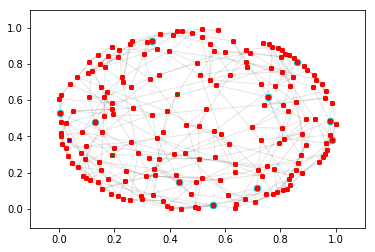

BITE


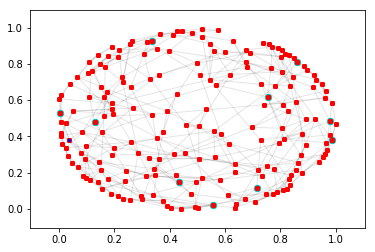

BITE


In [23]:
figureList = list()
# Parameters definition
numRumors = 10
maxThreshold = 1
numMonitors = 10
propagProba = 0.2
numNodes = 200
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
 

In [26]:
sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    printMonitorTrig(monitorTrigger)
    print('\n\nDifferent sets')
    print(*sets,sep='\n')

Real Source =  3
No sources identified

Monitoring Nodes :
Monitoring node number :  2 
	infected by rumor :  1 	at step :  3
	infected by rumor :  2 	at step :  4
	infected by rumor :  3 	at step :  4
	infected by rumor :  4 	at step :  4
	infected by rumor :  5 	at step :  9
	infected by rumor :  6 	at step :  2
	infected by rumor :  7 	at step :  5
	infected by rumor :  8 	at step :  1
	infected by rumor :  9 	at step :  3
	infected by rumor :  10 	at step :  9
Monitoring node number :  5 
	infected by rumor :  1 	at step :  9
	infected by rumor :  2 	at step :  5
	infected by rumor :  3 	at step :  1
	infected by rumor :  4 	at step :  5
	infected by rumor :  5 	at step :  5
	infected by rumor :  6 	at step :  4
	infected by rumor :  7 	at step :  6
	infected by rumor :  8 	at step :  6
	infected by rumor :  9 	at step :  1
	infected by rumor :  10 	at step :  3
Monitoring node number :  28 
	infected by rumor :  1 	at step :  12
	infected by rumor :  2 	at step :  10
	infected by 

Real Source =  3
Detected Source =  [3]


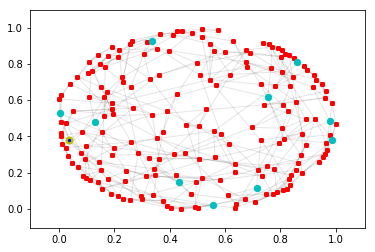

In [28]:
from networkUtils import drawColoredGraph2

setList = []
for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [31]:
A = nx.adjacency_matrix(Graph)